# Segmentação de imagens

Este notebook utiliza scripts contendo todos os conceitos vistos anteriormente:

1. Definição de um loop de treinamento para imagens de segmentação no arquivo train.py. Veja o comentário no início do arquivo para entender as pequenas diferenças entre o treinamento de segmentação e de classificação;
2. Definição do dataset de segmentação no arquivo dataset.py (utilizado dentro do script train.py)
3. Definição do modelo EncoderDecoder dentro do arquivo models.py

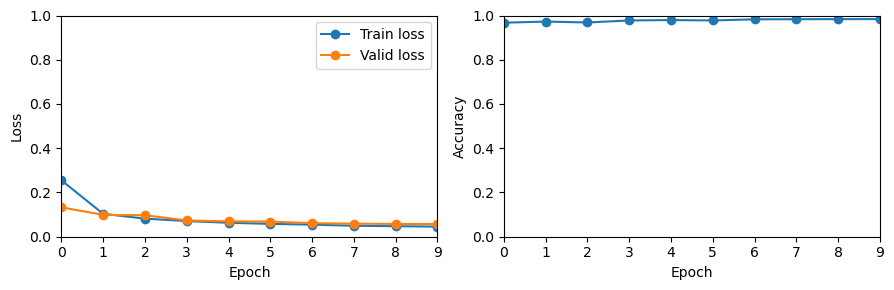

In [1]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
import train
from models import EncoderDecoder

params = {
    'bs_train':32,
    'bs_valid':8,
    'num_epochs':10,
    'lr':0.01,
    'weight_decay':1e-3,
    'resize_size':384,  
    'seed':0
}

encoder = resnet18(weights=ResNet18_Weights.DEFAULT)
model = EncoderDecoder(encoder, decoder_channels=64, num_classes=2)
ds_train, ds_valid, logger = train.train(model, **params)

In [2]:
logger[-1]

(9, 0.0457097627222538, 0.057348720729351044, 0.9837149977684021)

### Visualização dos resultados

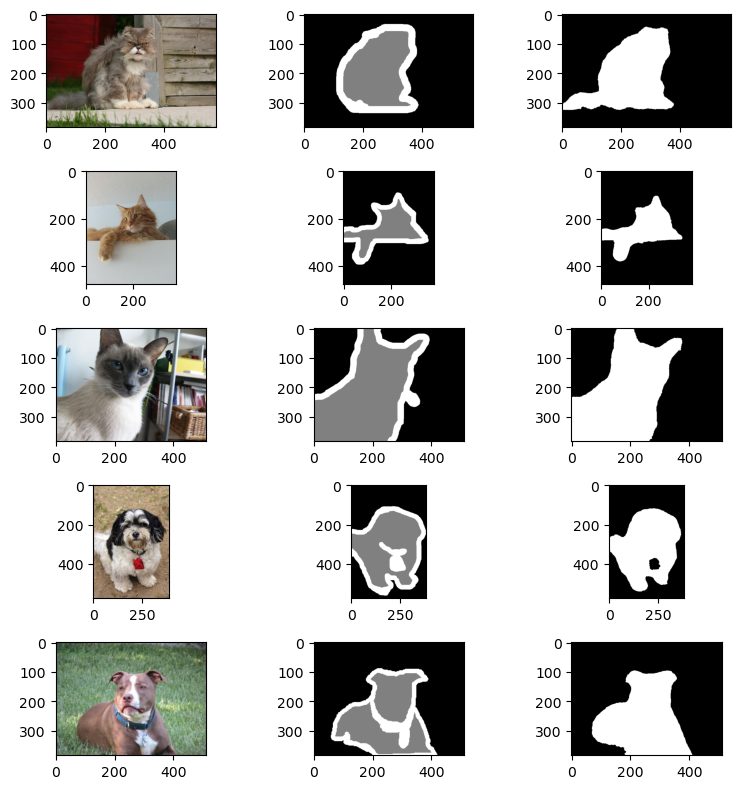

In [3]:
import matplotlib.pyplot as plt
import torch
import dataset

model.eval()
fig, axs = plt.subplots(5, 3, figsize=(8,8))
for idx in range(5):
    img, target = ds_valid[idx]
    with torch.no_grad():
        scores = model(img.unsqueeze(0))
    pred = torch.argmax(scores, dim=1)[0]
    axs[idx,0].imshow(dataset.unormalize(img))
    axs[idx,1].imshow(target, 'gray')
    axs[idx,2].imshow(pred, 'gray')
plt.tight_layout()

### Segmentação utilizando modelos do Pytorch

O Pytorch possui modelos pré-treinados que podem ser utilizados

In [9]:
from torch import nn
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights

# Modelo de segmentação com encoder ResNet50 treinado no ImageNet 
# e encoder e decoder treinados no dataset COCO
model = deeplabv3_resnet50(weights=DeepLabV3_ResNet50_Weights.DEFAULT)
# Alteração do modelo para ter 2 canais como saída
model.classifier[4] = nn.Conv2d(256, 2, 1)

O modelo pode ser treinado assim como fizemos acima:

```python
params = {
    'bs_train':32,
    'bs_valid':8,
    'num_epochs':10,
    'lr':0.01,
    'weight_decay':1e-3,
    'resize_size':384,  
    'seed':0
}

ds_train, ds_valid, logger = train_seg.train(model, **params)
```

\* Esta célula está em markdown para evitar execução